<a href="https://colab.research.google.com/github/Mahnytskyy/MN-4-8-Ivan-Mahnytskyy/blob/main/%D0%9B%D0%B0%D0%B15_1_%D0%9C%D0%B0%D0%B3%D0%BD%D0%B8%D1%86%D1%8C%D0%BA%D0%B8%D0%B9_%D0%86%D0%B2%D0%B0%D0%BD_%D0%A4%D0%86%D0%A2_4_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Перші 5 рядків датасету Iris:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


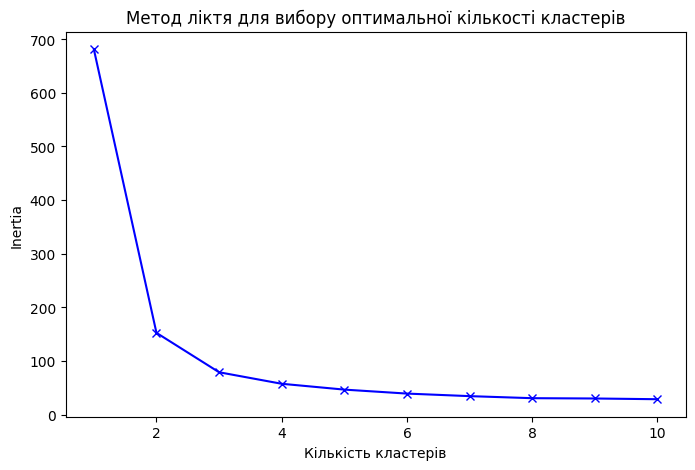

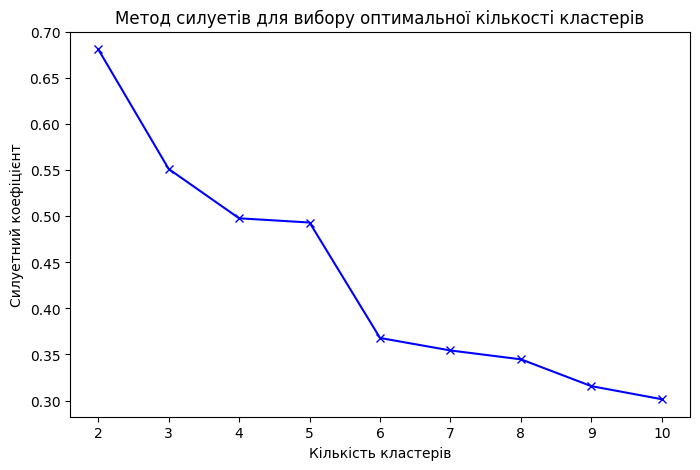

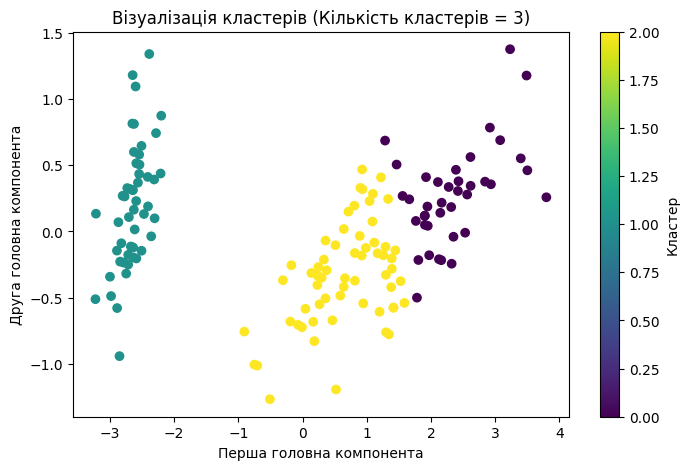

In [1]:
# Імпортуємо необхідні бібліотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Завантажуємо датасет Ірис
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Виведемо перші 5 рядочків датасету
print("Перші 5 рядків датасету Iris:")
print(iris_df.head())

# Метод ліктя для визначення оптимальної кількості кластерів
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(iris_df)
    inertia.append(kmeans.inertia_)

# Візуалізуємо метод ліктя
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Кількість кластерів')
plt.ylabel('Inertia')
plt.title('Метод ліктя для вибору оптимальної кількості кластерів')
plt.show()

# Метод силуетів для визначення якості кластеризації
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(iris_df)
    score = silhouette_score(iris_df, kmeans.labels_)
    silhouette_scores.append(score)

# Візуалізуємо метод силуетів
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, 'bx-')
plt.xlabel('Кількість кластерів')
plt.ylabel('Силуетний коефіцієнт')
plt.title('Метод силуетів для вибору оптимальної кількості кластерів')
plt.show()

# Обираємо оптимальну кількість кластерів (наприклад, 3 за методом ліктя та силуетів)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(iris_df)
clusters = kmeans.labels_

# Використаємо PCA для зменшення вимірності до 2 для візуалізації
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_df)

# Візуалізуємо кластери
plt.figure(figsize=(8, 5))
plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=clusters, cmap='viridis')
plt.title(f'Візуалізація кластерів (Кількість кластерів = {optimal_clusters})')
plt.xlabel('Перша головна компонента')
plt.ylabel('Друга головна компонента')
plt.colorbar(label='Кластер')
plt.show()
